# Analysis Data of Rating Zomato Resturant 
### In this project, we intend to analyze the data of Zomato restaurant and review their ranking method 


### Table content: The steps will generally be as follows:
- Extract and convert data to standard CSV
- Normalize many data
- The information is divided into two segment
- Clustering feature with Hierarchical method unsupervised 
- Clustering feature with K-means method unsupervised
- Set label with CoEfficient
- Merging clusters and sticking the label to data about delivery and classy ambiance
- Over sampling
- Feature selection
- Compare methods
- Random Forest Classifier
- Classification data for predicting user ratting
- Multiple ReClassification
- Multi-label Classification
- Multi-Class Classification
- Improve The Model
- Predict a new restaurant score
- Analysis functionality method be run



##### Developed by: M.khaki

#### Data from: kaggle.com


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import json
import csv
import os
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import train_test_split
from collections import Counter
import itertools
import pylab
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, ClusterWarning
from warnings import simplefilter
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import load_iris

itemNumberFile=[75,75,75,75,68]

## Extracte and Convert Data to Standard CSV
In this block, the required for this project is extracted five JSON data from the zomato restaurant on the Kaggle website.
Also, these items have been converted from JSON to CSV for further analysis

In [2]:
def selection_json(values,iterate):
    for i in range(iterate):
        for value in values[i]["restaurants"]:
            item = {
                "id": value["restaurant"]["R"]["res_id"],
                "has_online_delivery":value["restaurant"]["has_online_delivery"],
                "has_table_booking":value["restaurant"]["has_table_booking"],
                "is_delivering_now":value["restaurant"]["is_delivering_now"],
                "switch_to_order_menu":value["restaurant"]["switch_to_order_menu"],
                "cuisines":len(value["restaurant"]["cuisines"].split(",")),
                "average_cost_for_two":value["restaurant"]["average_cost_for_two"],
                "price_range":value["restaurant"]["price_range"],
                "votes":value["restaurant"]["user_rating"]["votes"],
                "aggregate_rating":value["restaurant"]["user_rating"]["aggregate_rating"],
                "currency":value["restaurant"]["currency"],
                
                }
            data.append(item)

data=[]
jsonFile = open('data/file1.json')
values = json.load(jsonFile)
jsonFile.close()
selection_json(values,itemNumberFile[0])
jsonFile = open('data/file2.json')
values = json.load(jsonFile)
jsonFile.close()
selection_json(values,itemNumberFile[1])
jsonFile = open('data/file3.json')
values = json.load(jsonFile)
jsonFile.close()
selection_json(values,itemNumberFile[2])
jsonFile = open('data/file4.json')
values = json.load(jsonFile)
jsonFile.close()
selection_json(values,itemNumberFile[3])
jsonFile = open('data/file5.json')
values = json.load(jsonFile)
jsonFile.close()
selection_json(values,itemNumberFile[4])
jsonData=json.dumps(data)
df = pd.read_json(jsonData)
df.to_csv('zomato_df.csv')
df = df.drop_duplicates(subset=['id'])
df.drop(df[(df["currency"]!= "$") & (df["currency"]!= "Rs.") & (df["currency"]!= "AED") & (df["currency"]!= "TL") & (df["currency"]!= "£") & (df["currency"]!= "QR") & (df["currency"]!= "LKR") & (df["currency"]!= "R$") & (df["currency"]!= "NZ$") & (df["currency"]!= "IDR")].index, inplace = True)

In [3]:
df.describe()

,id,has_online_delivery,has_table_booking,is_delivering_now,switch_to_order_menu,cuisines,average_cost_for_two,price_range,votes,aggregate_rating
count,3.324000e+03,3324.000000,3324.000000,3324.000000,3324.0,3324.000000,3324.000000,3324.000000,3324.000000,3324.000000
mean,8.778412e+06,0.212395,0.123345,0.001805,0.0,2.183514,2404.960289,2.152226,297.598075,3.196360
std,8.289744e+06,0.409064,0.328883,0.042454,0.0,1.156704,27279.320138,0.983305,648.639000,1.400834
min,5.500000e+01,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000
25%,3.051875e+05,0.000000,0.000000,0.000000,0.0,1.000000,150.000000,1.000000,16.000000,3.000000
50%,5.915300e+06,0.000000,0.000000,0.000000,0.0,2.000000,450.000000,2.000000,97.000000,3.600000
75%,1.823748e+07,0.000000,0.000000,0.000000,0.0,3.000000,800.000000,3.000000,288.000000,4.100000
max,1.849649e+07,1.000000,1.000000,1.000000,0.0,8.000000,800000.000000,4.000000,10934.000000,4.900000


Change vote to vote/max

In [4]:
vote_max=df["votes"].max()
df["votes"]=df["votes"]/vote_max

Convert currency to doller 

In [5]:
currency_convert = df[["average_cost_for_two","currency"]].values
for i in range(len(currency_convert)):
    if(currency_convert[i][1]=="Rs."):
        currency_convert[i][0]*=0.013
    if(currency_convert[i][1]=="AED"):
        currency_convert[i][0]*=0.27
    if(currency_convert[i][1]=="TL"):
        currency_convert[i][0]*=0.074        
    if(currency_convert[i][1]=="£"):
        currency_convert[i][0]*=1.35        
    if(currency_convert[i][1]=="QR"):
        currency_convert[i][0]*=0.27        
    if(currency_convert[i][1]=="LKR"):
        currency_convert[i][0]*=0.0049        
    if(currency_convert[i][1]=="R$"):
        currency_convert[i][0]*=0.06244  
    if(currency_convert[i][1]=="NZ$"):
        currency_convert[i][0]*=0.68 
    if(currency_convert[i][1]=="IDR"):
        currency_convert[i][0]*=0.00007
    else:
        currency_convert[i][0]=currency_convert[i][0]

## Normalize items of classification2
cuisines, average cost for two, price range and votes should be normalized between 0 and 1

In [6]:
df.columns

Index(['id', 'has_online_delivery', 'has_table_booking', 'is_delivering_now',
       'switch_to_order_menu', 'cuisines', 'average_cost_for_two',
       'price_range', 'votes', 'aggregate_rating', 'currency'],
      dtype='object')

Transformation some data from pandas to numpy for standard use in scikit learn

In [7]:
c2=df[["cuisines","average_cost_for_two","price_range","votes"]].values
c1=df[["id", "has_online_delivery", "has_table_booking", "is_delivering_now","switch_to_order_menu","aggregate_rating"]].values
df = pd.DataFrame(data=c1 , columns=["id", "has_online_delivery", "has_table_booking", "is_delivering_now","switch_to_order_menu","aggregate_rating"])

Normalize data with min-max scaler 

In [8]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(c2)
c2=scaler.transform(c2)
c2 = pd.DataFrame(data=c2 , columns=["cuisines","average_cost_for_two","price_range","votes"])

Concat class1 and normalized class2 & Ronded aggregate_rating parameter

In [9]:
data = pd.concat([df, c2], axis=1)
data.loc[(data["aggregate_rating"] >= 4.5), 'aggregate_rating'] = 5
data.loc[(data["aggregate_rating"] >= 3.8) & (data["aggregate_rating"] < 4.5), 'aggregate_rating'] = 4
data.loc[(data["aggregate_rating"] >= 2.8) & (data["aggregate_rating"] < 3.8), 'aggregate_rating'] = 3
data.loc[(data["aggregate_rating"] >= 1.8) & (data["aggregate_rating"] < 2.8), 'aggregate_rating'] = 2
data.loc[(data["aggregate_rating"] < 1.8), 'aggregate_rating'] = 1

data["aggregate_rating"]=data["aggregate_rating"].astype(int)
data.head()

,id,has_online_delivery,has_table_booking,is_delivering_now,switch_to_order_menu,aggregate_rating,cuisines,average_cost_for_two,price_range,votes
0,308322.0,1.0,1.0,0.0,0.0,4,0.428571,0.002000,0.666667,0.725352
1,18037817.0,0.0,1.0,0.0,0.0,5,0.714286,0.001875,0.666667,0.071154
2,312345.0,1.0,0.0,0.0,0.0,4,0.428571,0.001063,0.333333,0.140571
3,307490.0,0.0,1.0,0.0,0.0,4,0.142857,0.002313,0.666667,0.166728
4,18241537.0,0.0,1.0,0.0,0.0,4,0.428571,0.002000,0.666667,0.076825


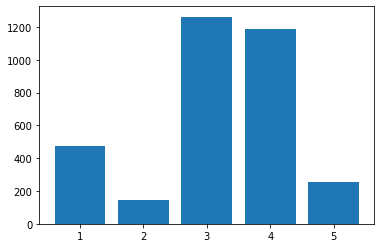

In [10]:
rating_histogram = Counter(data["aggregate_rating"])
plt.bar(rating_histogram.keys(), rating_histogram.values())
plt.show()

Pre processing and Check data type

In [11]:
data.dtypes

id                      float64
has_online_delivery     float64
has_table_booking       float64
is_delivering_now       float64
switch_to_order_menu    float64
aggregate_rating          int32
cuisines                float64
average_cost_for_two    float64
price_range             float64
votes                   float64
dtype: object

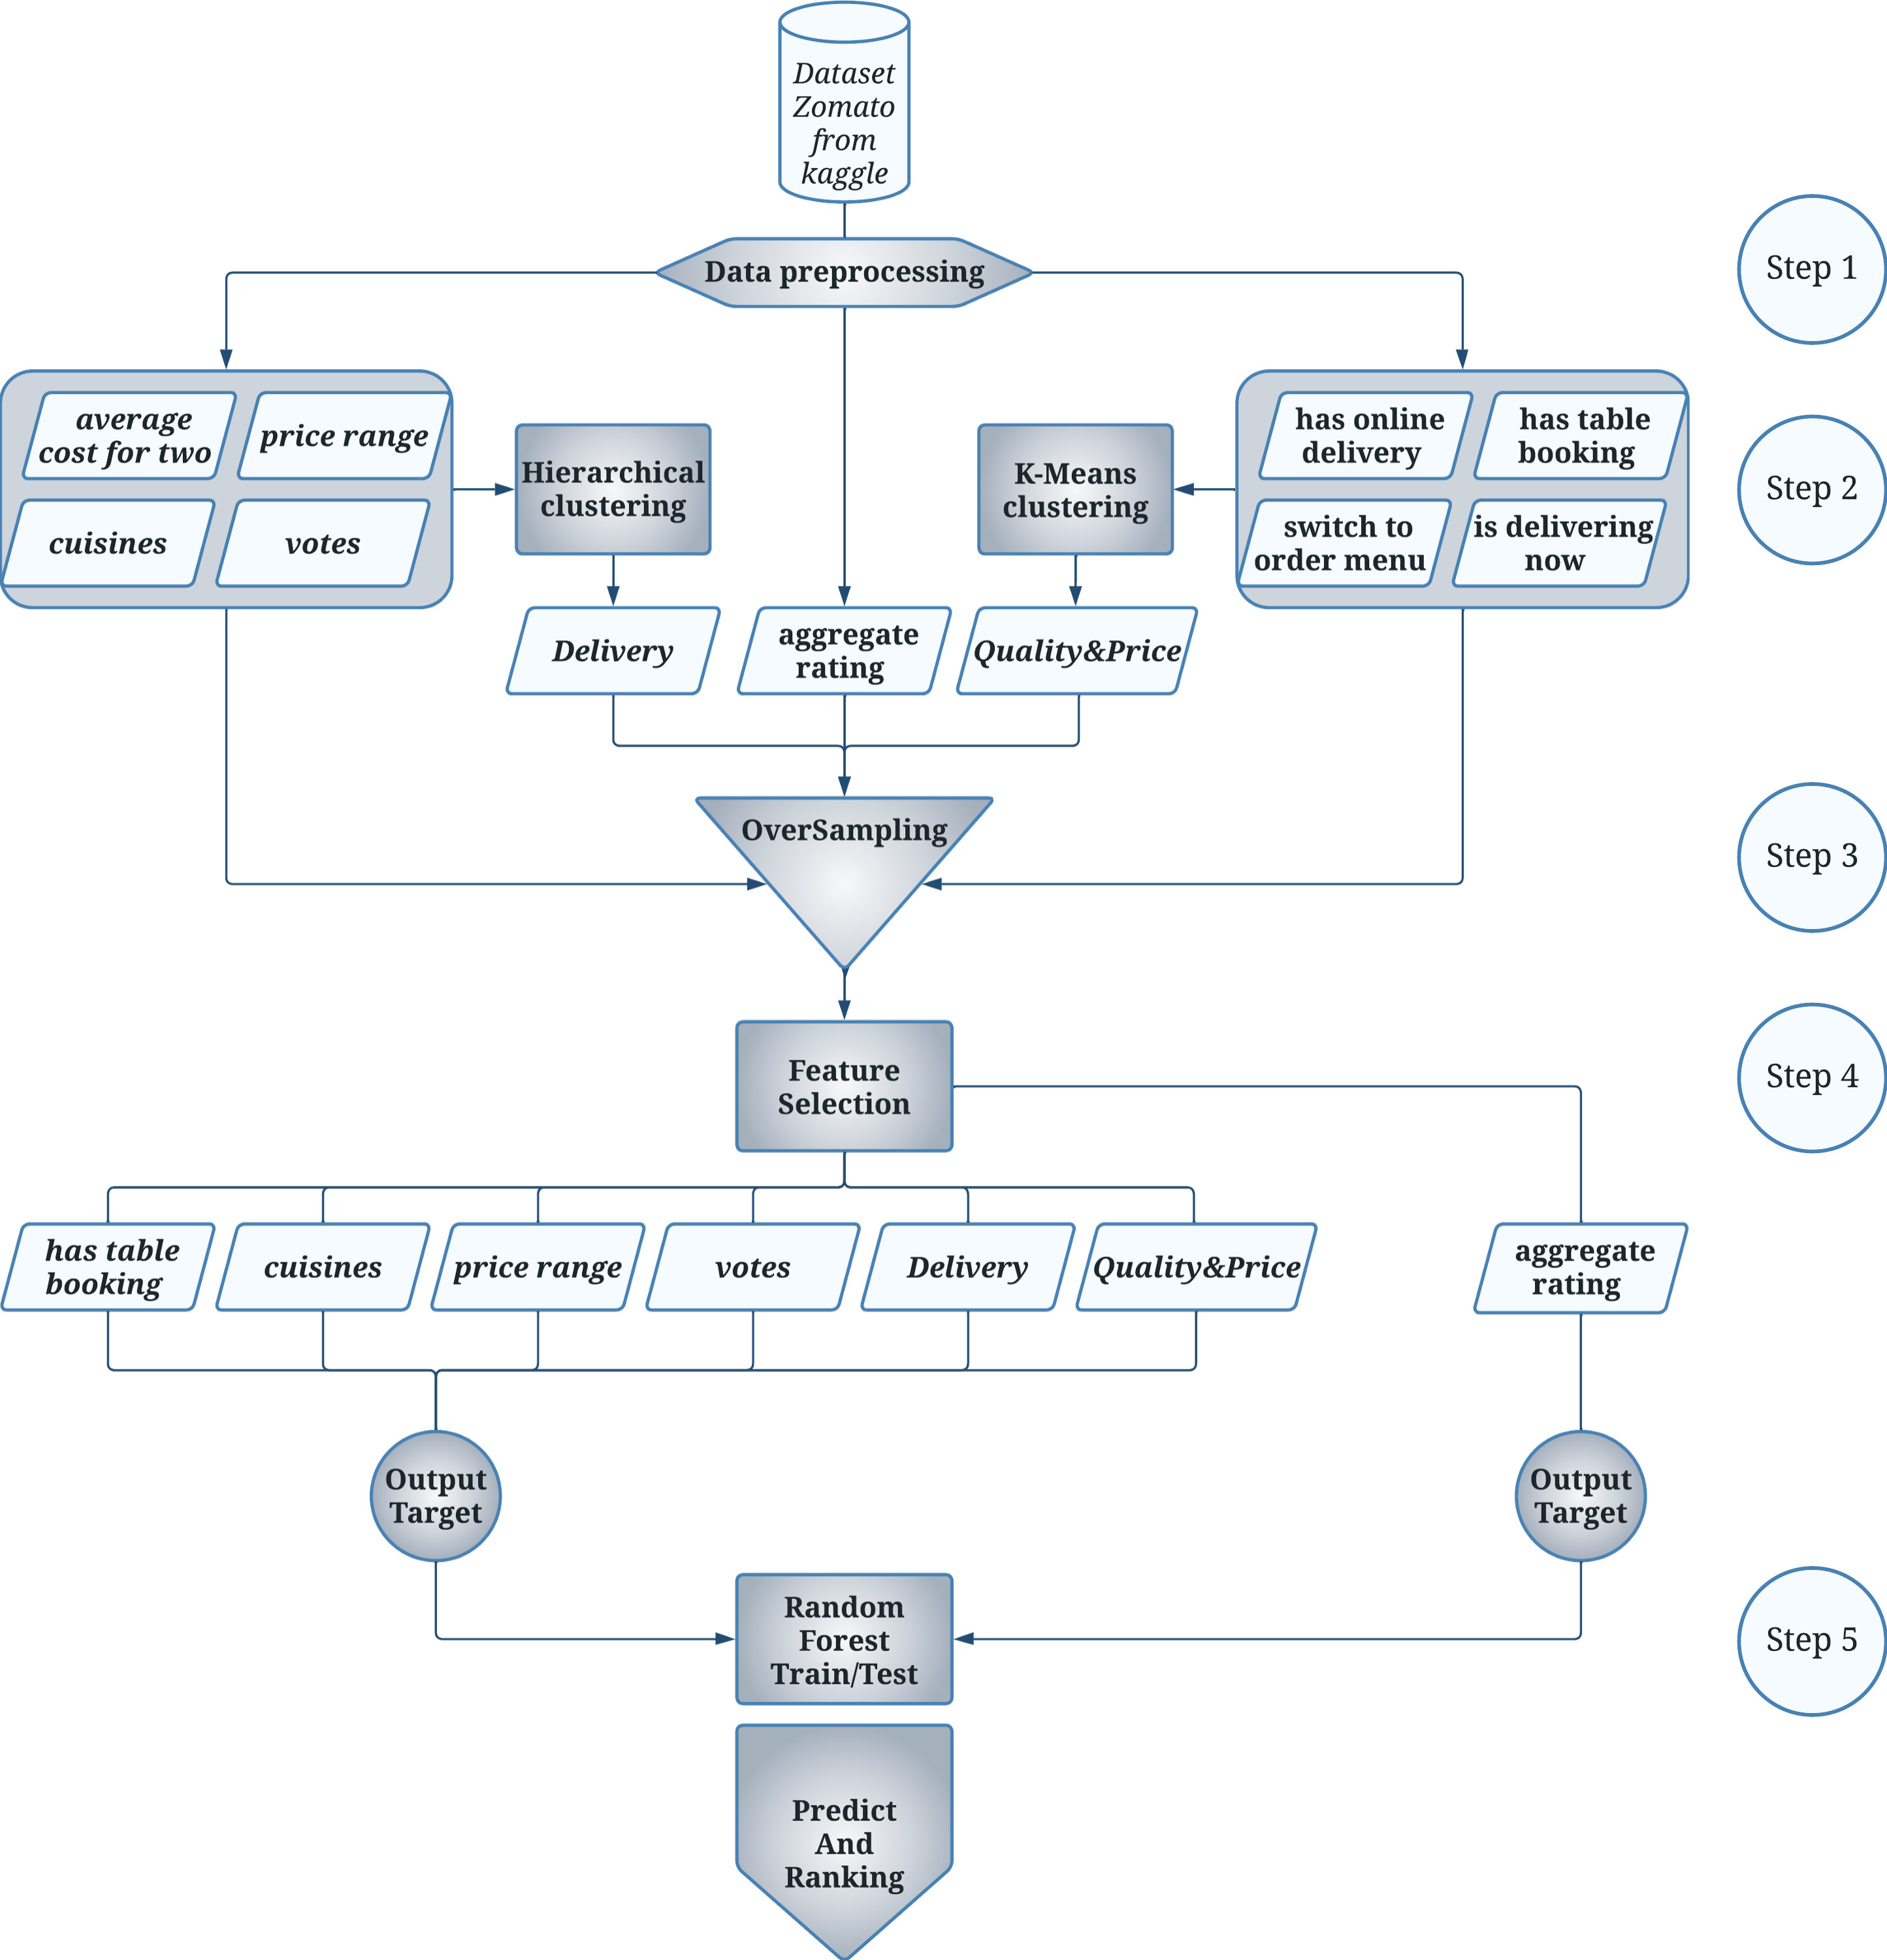

In [12]:
feature_c1 = data[["has_online_delivery", "has_table_booking", "is_delivering_now","switch_to_order_menu"]]
feature_c2 = data[["cuisines","average_cost_for_two","price_range","votes"]]
from IPython import display
display.Image("image/Data-Segmentation.JPEG")

# Clustering
Hierarchical Cluster1

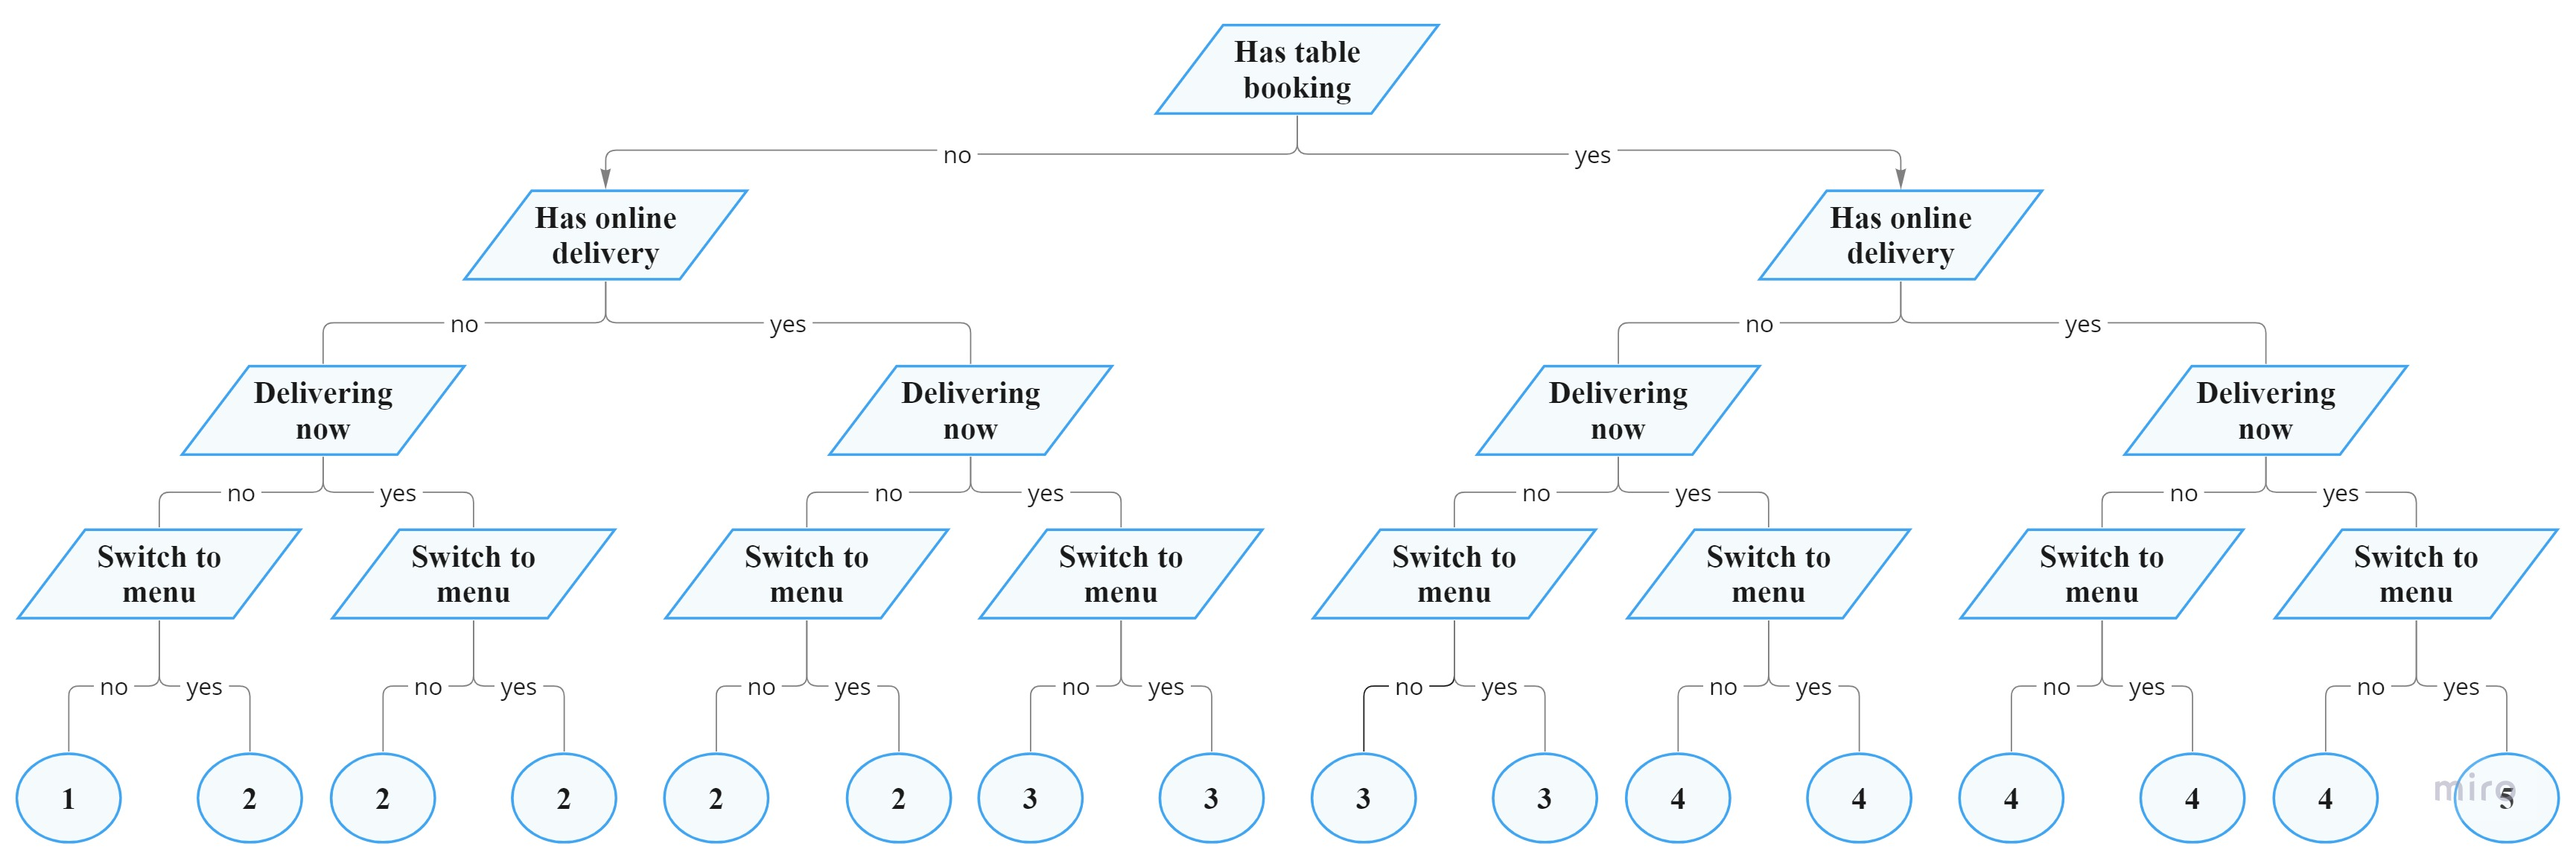

In [13]:
display.Image("image/hierarchical.JPG")

In [14]:
def computeDeliveryTree(temp_tree):
    if(temp_tree[1]==0):
        if(temp_tree[0]+temp_tree[2]+temp_tree[3]==0):
            return 1
        if(temp_tree[0]==0 and temp_tree[2]==0 and temp_tree[3]==1):
            return 2
        if(temp_tree[0]==0 and temp_tree[2]==1 and temp_tree[3]==0):
            return 2 
        if(temp_tree[0]==0 and temp_tree[2]==1 and temp_tree[3]==1):
            return 2
        if(temp_tree[0]==1 and temp_tree[2]==0 and temp_tree[3]==0):
            return 2
        if(temp_tree[0]==1 and temp_tree[2]==0 and temp_tree[3]==1):
            return 2 
        if(temp_tree[0]==1 and temp_tree[2]==1 and temp_tree[3]==0):
            return 3
        if(temp_tree[0]==1 and temp_tree[2]==1 and temp_tree[3]==1):
            return 3
    if(temp_tree[1]==1):
        if(temp_tree[0]+temp_tree[2]+temp_tree[3]==0):
            return 3
        if(temp_tree[0]==0 and temp_tree[2]==0 and temp_tree[3]==1):
            return 3
        if(temp_tree[0]==0 and temp_tree[2]==1 and temp_tree[3]==0):
            return 4 
        if(temp_tree[0]==0 and temp_tree[2]==1 and temp_tree[3]==1):
            return 4
        if(temp_tree[0]==1 and temp_tree[2]==0 and temp_tree[3]==0):
            return 4
        if(temp_tree[0]==1 and temp_tree[2]==0 and temp_tree[3]==1):
            return 4 
        if(temp_tree[0]==1 and temp_tree[2]==1 and temp_tree[3]==0):
            return 4
        if(temp_tree[0]==1 and temp_tree[2]==1 and temp_tree[3]==1):
            return 5
temp_tree = feature_c1.values
temp_label = []
for i in range(temp_tree.shape[0]):
    temp_label.append(computeDeliveryTree(temp_tree[i]))

In [15]:
labels1 = temp_label

with k-means method

In [16]:
# import sklearn.metrics as metrics
# import math
# import operator
# min_cluster = 5
# max_cluster = 30
# max_cluster +=1
# K=range(min_cluster,max_cluster)
# wss = []
# for k in K:
#     kmeans=KMeans(n_clusters=k,init="k-means++")
#     kmeans=kmeans.fit(feature_c2)
#     wss_iter = kmeans.inertia_
#     wss.append(wss_iter)
# mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})


# elbow_y = []
# for i in range(min_cluster,max_cluster):
#     labels=KMeans(n_clusters=i,init="k-means++").fit(feature_c2).labels_
#     elbow_y.append(metrics.silhouette_score(feature_c2,labels,metric="euclidean",sample_size=1000,random_state=200))
    
    
# mycenters= np.asarray(mycenters)
# mycenters_index = [row[0] for row in sorted(mycenters, key = operator.itemgetter(0,1))]
# mycenters_value = [row[1] for row in sorted(mycenters, key = operator.itemgetter(0,1))]
# plt.plot(mycenters_index,mycenters_value,'-.r')
# plt.plot([mycenters_index[0], mycenters_index[-1]], [mycenters_value[0], mycenters_value[-1]], 'k-')
# plt.show()


# def calc_distance(x1, y1, a, b, c):
#     d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
#     return d
# a = mycenters_value[0] - mycenters_value[-1]
# b = mycenters_index[-1] - mycenters_index[0]
# c1 = mycenters_index[0] * mycenters_value[-1]
# c2 = mycenters_index[-1] * mycenters_value[0]
# c = c1 - c2
# distance_of_points_from_line = []
# for k in range(max_cluster-min_cluster):
#     distance_of_points_from_line.append(calc_distance(mycenters_index[k], mycenters_value[k], a, b, c))


# optimum_kmeans = 1
# maximum_point_from_line = 0
# for i in range(len(distance_of_points_from_line)):
#     if(distance_of_points_from_line[i] > maximum_point_from_line):
#         maximum_point_from_line = distance_of_points_from_line[i]
#         optimum_kmeans = i
# optimum_kmeans = optimum_kmeans + min_cluster
# print(optimum_kmeans)

In [17]:
optimum_kmeans = 13
k_means2 = KMeans(init = "k-means++", n_clusters = optimum_kmeans, n_init = 50)
k_means2.fit(feature_c2)
labels2 = k_means2.labels_

# Set label with CoEfficient

In [18]:
import operator
data_set_kmeans = pd.DataFrame(data=data , columns=["aggregate_rating"])
data_set_kmeans["Quality&Price"] = labels2
highCoef2=[]
labels2_temp=[]
for i in range(optimum_kmeans):
    highCoef2.append([i,data_set_kmeans.loc[(data_set_kmeans["Quality&Price"] == i)][["aggregate_rating"]].mean()[0]])
highCoef2 = [row[0] for row in sorted(highCoef2, key = operator.itemgetter(1,0))]
for i in range(len(labels2)):
    for j in range(len(highCoef2)):
        if(labels2[i]==highCoef2[j]): 
            labels2_temp.append(j)
labels2 = labels2_temp
for i in range(len(labels2)):
    labels2[i]=labels2[i]+1
labels2 = np.asarray(labels2)


data["Delivery"] = labels1
data["Quality&Price"] = labels2


print(data["Delivery"].corr(data["aggregate_rating"]))
print(data["Quality&Price"].corr(data["aggregate_rating"]))

0.12267492514775012
0.4805889794401005


## Stick label from result clustering 

In [19]:
data.loc[(data["Delivery"] >= 3) & (data["Quality&Price"] >= 8), 'output label'] = 'Delivery & Classy ambiance'
data.loc[(data["Delivery"] >= 3) & (data["Quality&Price"] < 8), 'output label'] = 'Delivery'
data.loc[(data["Delivery"] < 3) & (data["Quality&Price"] >= 8), 'output label'] = 'Classy ambiance'
data.loc[(data["Delivery"] < 3) & (data["Quality&Price"] < 8), 'output label'] = 'Not any'
data.head()

,id,has_online_delivery,has_table_booking,is_delivering_now,switch_to_order_menu,aggregate_rating,cuisines,average_cost_for_two,price_range,votes,Delivery,Quality&Price,output label
0,308322.0,1.0,1.0,0.0,0.0,4,0.428571,0.002000,0.666667,0.725352,4,13,Delivery & Classy ambiance
1,18037817.0,0.0,1.0,0.0,0.0,5,0.714286,0.001875,0.666667,0.071154,3,11,Delivery & Classy ambiance
2,312345.0,1.0,0.0,0.0,0.0,4,0.428571,0.001063,0.333333,0.140571,2,7,Not any
3,307490.0,0.0,1.0,0.0,0.0,4,0.142857,0.002313,0.666667,0.166728,3,9,Delivery & Classy ambiance
4,18241537.0,0.0,1.0,0.0,0.0,4,0.428571,0.002000,0.666667,0.076825,3,8,Delivery & Classy ambiance


Normalize Quality and price between 0 and 1

In [20]:
normalizer_qp=data[["Delivery","Quality&Price"]].values
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(normalizer_qp)
normalizer_qp=scaler.transform(normalizer_qp)
normalizer_qp = pd.DataFrame(data=normalizer_qp , columns=["Delivery","Quality&Price"])
data["Delivery"] = normalizer_qp["Delivery"]
data["Quality&Price"] = normalizer_qp["Quality&Price"]

In [21]:
zomato_csv = pd.read_csv('data/zomato.csv',encoding='ISO-8859-1')
zomato_csv = zomato_csv[["Restaurant ID","Restaurant Name","Country Code","City"]]
countryCode = pd.read_excel('data/Country-Code.xlsx')

zomato_csv.columns = ["id", "Restaurant Name", "Country Code", "City"]
countryCode.columns = ["Country Code", "Country"]
data["id"]=data["id"].astype(int)
data_merge = data[["id", "Delivery", "Quality&Price", "aggregate_rating", "output label"]] 


result = pd.merge(zomato_csv, countryCode, how="inner", on="Country Code")
result = result[["id", "Restaurant Name", "Country"]]
result = pd.merge(result, data_merge, how="inner", on="id")
result

,id,Restaurant Name,Country,Delivery,Quality&Price,aggregate_rating,output label
0,6600681,Chez Michou,Brazil,0.0,0.250000,3,Not any
1,6601005,Cafí© Daniel Briand,Brazil,0.0,0.000000,4,Not any
2,6600292,Casa do Biscoito Mineiro,Brazil,0.0,0.333333,3,Not any
3,6600441,Maori,Brazil,0.0,0.666667,4,Classy ambiance
4,6600970,Pizza íæ Bessa,Brazil,0.0,0.333333,3,Not any
...,...,...,...,...,...,...,...
3313,5915730,NamlÛ± Gurme,Turkey,0.0,0.666667,4,Classy ambiance
3314,5908749,Ceviz AÛôacÛ±,Turkey,0.0,0.583333,4,Classy ambiance
3315,5915807,Huqqa,Turkey,0.0,0.916667,3,Classy ambiance
3316,5916112,Aôôk Kahve,Turkey,0.0,0.916667,4,Classy ambiance


In [22]:
result[result["Delivery"]!=1]

,id,Restaurant Name,Country,Delivery,Quality&Price,aggregate_rating,output label
0,6600681,Chez Michou,Brazil,0.0,0.250000,3,Not any
1,6601005,Cafí© Daniel Briand,Brazil,0.0,0.000000,4,Not any
2,6600292,Casa do Biscoito Mineiro,Brazil,0.0,0.333333,3,Not any
3,6600441,Maori,Brazil,0.0,0.666667,4,Classy ambiance
4,6600970,Pizza íæ Bessa,Brazil,0.0,0.333333,3,Not any
...,...,...,...,...,...,...,...
3313,5915730,NamlÛ± Gurme,Turkey,0.0,0.666667,4,Classy ambiance
3314,5908749,Ceviz AÛôacÛ±,Turkey,0.0,0.583333,4,Classy ambiance
3315,5915807,Huqqa,Turkey,0.0,0.916667,3,Classy ambiance
3316,5916112,Aôôk Kahve,Turkey,0.0,0.916667,4,Classy ambiance


# Over sampling
oversampling helps to data balance on user rating

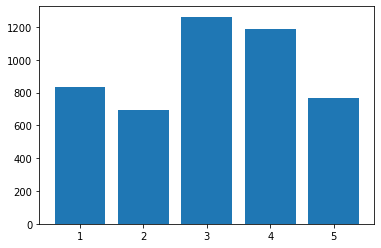

In [23]:
from imblearn.over_sampling import SMOTE
oversampel_x=data[["id", "has_online_delivery", "has_table_booking", "is_delivering_now","switch_to_order_menu","cuisines","average_cost_for_two","price_range","votes", "Delivery", "Quality&Price"]].values
oversampel_y=data[["aggregate_rating"]].values

ratingCount = []
temp_key = []
for i in range(1,6):  
    ratingCount.append(data.loc[(data["aggregate_rating"] == i )].count().aggregate_rating)
max_key = ratingCount.index(np.max(ratingCount))+1
min_key = ratingCount.index(np.min(ratingCount))+1
# print(max_key)
# print(min_key)
# print(ratingCount)

if(ratingCount[max_key-1]*0.55 > ratingCount[min_key-1]):
    max_value = ratingCount[max_key-1]
    min_value = (max_value*0.55).astype(int)
else:
    max_value = ratingCount[max_key-1]
    min_value=ratingCount[min_key-1]    

    
temp_value = []
temp_grow = [] 
for i in range(5):
    if(i!= max_key-1 and i!= min_key-1):
        temp_key.append(i+1) 
for i in range(3):
    temp_grow.append(ratingCount[temp_key[i]-1]/ratingCount[min_key-1])
temp_grow_sum = sum(temp_grow)
for i in range(3):
    temp_grow[i]=temp_grow[i]/temp_grow_sum
for i in range(3):
    temp = ((max_value - min_value)*(temp_grow[i]) + min_value).astype(int)
    if(temp > ratingCount[temp_key[i]-1]):    
        temp_value.append(((max_value - min_value)*(temp_grow[i]) + min_value).astype(int))
    else:
        temp_value.append(ratingCount[temp_key[i]-1].astype(int))
    

strategy = {
    max_key: max_value,
    min_key: min_value,
    temp_key[0]: temp_value[0],
    temp_key[1]: temp_value[1],
    temp_key[2]: temp_value[2],
}
oversample = SMOTE(sampling_strategy=strategy)
oversampel_x, oversampel_y = oversample.fit_resample(oversampel_x, oversampel_y)
counter = Counter(oversampel_y)
oversampel_x = pd.DataFrame(data=oversampel_x , columns=["id", "has_online_delivery", "has_table_booking", "is_delivering_now","switch_to_order_menu","cuisines","average_cost_for_two","price_range","votes", "Delivery", "Quality&Price"])
oversampel_y = pd.DataFrame(data=oversampel_y , columns=["aggregate_rating"])
data_oversampeled = pd.concat([oversampel_x, oversampel_y], axis=1)

plt.bar(counter.keys(), counter.values())
plt.show()

In [24]:
on_delivery = pd.DataFrame(data=data_oversampeled , columns=["id", "has_online_delivery", "has_table_booking", "is_delivering_now","switch_to_order_menu","cuisines","average_cost_for_two","price_range","votes", "Delivery", "Quality&Price","aggregate_rating"])
x_fs = on_delivery[["has_online_delivery", "has_table_booking", "is_delivering_now","switch_to_order_menu","cuisines","average_cost_for_two","price_range","votes","Delivery", "Quality&Price"]]
y_fs = on_delivery["aggregate_rating"]

In [25]:
on_delivery.describe()

,id,has_online_delivery,has_table_booking,is_delivering_now,switch_to_order_menu,cuisines,average_cost_for_two,price_range,votes,Delivery,Quality&Price,aggregate_rating
count,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.0,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,8.849075e+06,0.230047,0.112170,0.001880,0.0,0.164735,0.003387,0.362829,0.028756,0.152089,0.374843,3.076874
std,8.339285e+06,0.405139,0.304616,0.040243,0.0,0.155265,0.035685,0.320272,0.062954,0.262215,0.284639,1.319662
min,5.500000e+01,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.036505e+05,0.000000,0.000000,0.000000,0.0,0.000000,0.000219,0.000000,0.001153,0.000000,0.083333,2.000000
50%,6.103529e+06,0.000000,0.000000,0.000000,0.0,0.142857,0.000537,0.333333,0.007774,0.000000,0.333333,3.000000
75%,1.825579e+07,0.229215,0.000000,0.000000,0.0,0.285714,0.000978,0.666667,0.027437,0.333333,0.583333,4.000000
max,1.849649e+07,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


## Feature selection
Find suitable size for Supervised Classifier

Run the feature selection method (Sequential Feature Selector (sfs))

In [26]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# # Sequential Forward Selection
# sfs = SFS(model, 
#           k_features=5, 
#           forward=True, 
#           floating=False, 
#           scoring='accuracy',
#           cv=4,
#           n_jobs=-1)
# sfs = sfs.fit(x_fs, y_fs)

# print('\nSequential Forward Selection (k=5):')
# print(sfs.k_feature_idx_)
# print('CV Score:')
# print(sfs.k_score_)

# ###################################################

# # Sequential Backward Selection
# sbs = SFS(model, 
#           k_features=5, 
#           forward=False, 
#           floating=False, 
#           scoring='accuracy',
#           cv=4,
#           n_jobs=-1)
# sbs = sbs.fit(x_fs, y_fs)

# print('\nSequential Backward Selection (k=5):')
# print(sbs.k_feature_idx_)
# print('CV Score:')
# print(sbs.k_score_)

# ###################################################

# # Sequential Forward Floating Selection
# sffs = SFS(model, 
#            k_features=5, 
#            forward=True, 
#            floating=True, 
#            scoring='accuracy',
#            cv=4,
#            n_jobs=-1)
# sffs = sffs.fit(x_fs, y_fs)

# print('\nSequential Forward Floating Selection (k=5):')
# print(sffs.k_feature_idx_)
# print('CV Score:')
# print(sffs.k_score_)

# ###################################################

# # Sequential Backward Floating Selection
# sbfs = SFS(model, 
#            k_features=5, 
#            forward=False, 
#            floating=True, 
#            scoring='accuracy',
#            cv=4,
#            n_jobs=-1)
# sbfs = sbfs.fit(x_fs, y_fs)

# print('\nSequential Backward Floating Selection (k=5):')
# print(sbfs.k_feature_idx_)
# print('CV Score:')
# print(sbfs.k_score_)

In [27]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier()

# sfs_size = SFS(model, 
#            k_features="best",
#            forward=True, 
#            floating=False,
#            scoring='accuracy',
#            fixed_features=('Quality&Price', 'Delivery'))


# sfs_size = sfs_size.fit(x_fs, y_fs)

# metric_dict = sfs_size.get_metric_dict(confidence_interval=0.90)
# fig1 = plot_sfs(metric_dict, kind='std_dev')
# plt.title('Sequential Forward Selection')
# plt.grid()
# plt.show()

In [28]:
# pd.DataFrame.from_dict(sfs_size.get_metric_dict()).T[["feature_idx","avg_score","feature_names"]]

In [29]:
# from sklearn.feature_selection import SequentialFeatureSelector
# # sfs = SequentialFeatureSelector(model, n_features_to_select=len(sfs_size.k_feature_names_) , direction='forward')
# sfs = SequentialFeatureSelector(model, n_features_to_select=5 , direction='forward')


# sfs.fit(x_fs,y_fs)
# sfs.get_support()

In [30]:
FSelected = []
# for i in range(len(sfs.get_feature_names_out())):
#     FSelected.append(sfs.get_feature_names_out()[i])
# FSelected

FSelected.append('has_table_booking')
FSelected.append('cuisines')
FSelected.append('price_range')
FSelected.append('votes')
FSelected.append('Delivery')
FSelected.append('Quality&Price')
FSelected

['has_table_booking',
 'cuisines',
 'price_range',
 'votes',
 'Delivery',
 'Quality&Price']

## Train/Test
Split data to two part train,test

The Random Forest algorithm offers a choice of tree desision for performing its processing. 

In [31]:
x = on_delivery[FSelected]
y = on_delivery["aggregate_rating"]

x=np.asarray(x)
y=np.asarray(y).ravel()

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.3 , random_state=5)

Compute Probability of belonging to the class

In [33]:
from sklearn.ensemble import RandomForestClassifier
y_score = RandomForestClassifier().fit(x_train, y_train).predict_proba(x_test)
# print(y_score)

Binarizer label of y_test

In [34]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(1425, 5)

Compute TPR and FPR

In [35]:
from sklearn.metrics import auc, roc_curve
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(y_onehot_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(y_onehot_test.shape[1]):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= y_onehot_test.shape[1]

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

In [36]:
from sklearn.metrics import roc_auc_score
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="macro",
)

# print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{macro_roc_auc_ovr:.2f}")

Find best point of ROC And Find best TPR FPR

In [37]:
import math  
tresh = 0
for i in range(tpr["macro"].shape[0]):
    miangin = (tpr["macro"][i]+fpr["macro"][i])/2
    tresh_dist = math.sqrt((math.pow(tpr["macro"][i]-miangin,2)) + (math.pow(fpr["macro"][i]-miangin,2)))
    if(tresh<tresh_dist):
        tresh,op_index,op_tpr,op_fpr = tresh_dist,i,tpr["macro"][i],fpr["macro"][i]
        
print(tresh,"==>",op_index,"==>",op_tpr,"==>",op_fpr)

0.46173137474651815 ==> 190 ==> 0.8431769625298902 ==> 0.19019019019019018


## TPR,FPR ROC curve Plot 

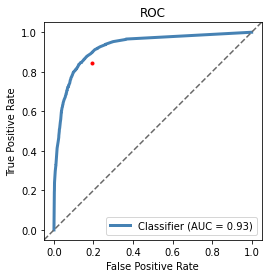

In [38]:
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    color="steelblue",
    linewidth=3,
)
plt.axline((0, 0), slope=1,linestyle='--', color='dimgrey')
plt.plot(op_fpr, op_tpr, 'r.')
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend()
plt.show()

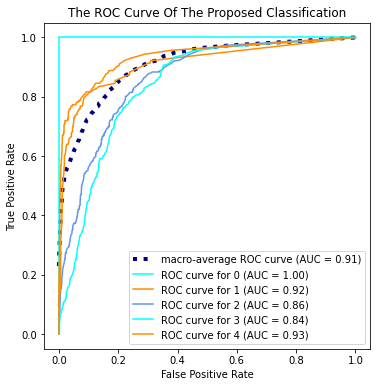

In [39]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))


plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(y_onehot_test.shape[1]), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {class_id}",
        color=color,
        ax=ax
    )

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("The ROC Curve Of The Proposed Classification")
plt.legend()
plt.show()

Finding best treshhold

In [40]:
from sklearn.metrics import f1_score
y_probs = y_score
y_test_treshhold = y_onehot_test

thresholds = np.arange(0, 0.6, 0.01)
best_threshold = 0.5
best_f1 = 0

for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test_treshhold, y_pred, average='macro')
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Best Threshold:", best_threshold)

Best Threshold: 0.29


Comput F1 with optimal treshhold

In [41]:
y_probs = y_score
y_test_treshhold = y_onehot_test

y_pred = (y_probs >= best_threshold).astype(int)

print("Optimal F1 Score:", f1_score(y_test_treshhold, y_pred, average='macro'))

Optimal F1 Score: 0.7542317256043316


In [42]:
y_score

array([[1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.17, 0.82, 0.01],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.99, 0.01, 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.02, 0.3 , 0.01, 0.03, 0.64]])

Predict user rating with supervise

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier()
clf1.fit(x_train,y_train)
yhat1=clf1.predict(x_test)

from sklearn import svm
clf2=svm.SVC(kernel="rbf",gamma=10)
clf2.fit(x_train,y_train)
yhat2=clf2.predict(x_test)

clf3=svm.SVC(kernel="linear",gamma=10)
clf3.fit(x_train,y_train)
yhat3=clf3.predict(x_test)

from sklearn.neighbors import KNeighborsClassifier
clf4=KNeighborsClassifier(n_neighbors=5)
clf4.fit(x_train,y_train)
yhat4=clf4.predict(x_test)

from sklearn.tree import DecisionTreeClassifier
clf5=DecisionTreeClassifier(random_state=0)
clf5.fit(x_train,y_train)
yhat5=clf5.predict(x_test)

from sklearn.naive_bayes import GaussianNB
clf6=GaussianNB()
clf6.fit(x_train,y_train)
yhat6=clf6.predict(x_test)

In [44]:
print("kappa RandomForest",cohen_kappa_score(y_test, yhat1)*100)
print("kappa svm Rbf",cohen_kappa_score(y_test, yhat2)*100)
print("kappa svm linear",cohen_kappa_score(y_test, yhat3)*100)
print("kappa Nearest Neighbors",cohen_kappa_score(y_test, yhat4)*100)
print("kappa DecisionTree",cohen_kappa_score(y_test, yhat5)*100)
print("kappa Naive Bayes",cohen_kappa_score(y_test, yhat6)*100)
print("\n")
from sklearn.metrics import accuracy_score
print("accuracy RandomForest",accuracy_score(y_test, yhat1)*100)
print("accuracy svm Rbf",accuracy_score(y_test, yhat2)*100)
print("accuracy svm linear",accuracy_score(y_test, yhat3)*100)
print("accuracy Nearest Neighbors",accuracy_score(y_test, yhat4)*100)
print("accuracy DecisionTree",accuracy_score(y_test, yhat5)*100)
print("accuracy Naive Bayes",accuracy_score(y_test, yhat6)*100)
print("\n")
from sklearn.metrics import f1_score
print("f1_score RandomForest",f1_score(y_test, yhat1, average='macro')*100)
print("f1_score svm Rbf",f1_score(y_test, yhat2, average='macro')*100)
print("f1_score svm linear",f1_score(y_test, yhat3, average='macro')*100)
print("f1_score Nearest Neighbors",f1_score(y_test, yhat4, average='macro')*100)
print("f1_score DecisionTree",f1_score(y_test, yhat5, average='macro')*100)
print("f1_score Naive Bayes",f1_score(y_test, yhat6, average='macro')*100)

print("\n")
from sklearn.metrics import precision_score
print("precision RandomForest",precision_score(y_test, yhat1, average='macro')*100)
print("precision svm Rbf",precision_score(y_test, yhat2, average='macro')*100)
print("precision svm linear",precision_score(y_test, yhat3, average='macro')*100)
print("precision Nearest Neighbors",precision_score(y_test, yhat4, average='macro')*100)
print("precision DecisionTree",precision_score(y_test, yhat5, average='macro')*100)
print("precision Naive Bayes",precision_score(y_test, yhat6, average='macro')*100)

kappa RandomForest 63.54337798757439
kappa svm Rbf 40.62897441174796
kappa svm linear 29.64280240309356
kappa Nearest Neighbors 57.700876327805204
kappa DecisionTree 58.593337655320084
kappa Naive Bayes 33.52163531535729


accuracy RandomForest 71.36842105263158
accuracy svm Rbf 53.26315789473684
accuracy svm linear 44.8421052631579
accuracy Nearest Neighbors 66.94736842105263
accuracy DecisionTree 67.50877192982456
accuracy Naive Bayes 46.59649122807018


f1_score RandomForest 73.91933854662975
f1_score svm Rbf 54.35501266594984
f1_score svm linear 40.78704224706704
f1_score Nearest Neighbors 67.78157704515266
f1_score DecisionTree 69.91247095366849
f1_score Naive Bayes 47.43148846720883


precision RandomForest 74.6725438254301
precision svm Rbf 56.68176626061786
precision svm linear 44.396105463978664
precision Nearest Neighbors 69.78747899400652
precision DecisionTree 70.69074056170831
precision Naive Bayes 51.14867156413771


In [45]:
clf=RandomForestClassifier(n_estimators=50,criterion="gini",max_depth=10,min_samples_split=10)
clf.fit(x_train,y_train)
yhat=clf.predict(x_test)

In [46]:
clf.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [47]:
print("accuracy RandomForest",accuracy_score(y_test, yhat)*100)

accuracy RandomForest 74.80701754385964


## Multiple Classification

In [48]:
x_train_new , x_test_new , y_train_new , y_test_new = train_test_split(y_pred , y_test , test_size=0.3 , random_state=5)

In [49]:
clf1_new=RandomForestClassifier()
clf1_new.fit(x_train_new,y_train_new)
yhat1_new=clf1_new.predict(x_test_new)


clf2_new=svm.SVC(kernel="rbf",gamma=10)
clf2_new.fit(x_train_new,y_train_new)
yhat2_new=clf2_new.predict(x_test_new)

clf3_new=svm.SVC(kernel="linear",gamma=10)
clf3_new.fit(x_train_new,y_train_new)
yhat3_new=clf3_new.predict(x_test_new)


clf4_new=KNeighborsClassifier(n_neighbors=5)
clf4_new.fit(x_train_new,y_train_new)
yhat4_new=clf4_new.predict(x_test_new)


clf5_new=DecisionTreeClassifier(random_state=0)
clf5_new.fit(x_train_new,y_train_new)
yhat5_new=clf5_new.predict(x_test_new)


clf6_new=GaussianNB()
clf6_new.fit(x_train_new,y_train_new)
yhat6_new=clf6_new.predict(x_test_new)

print("accuracy RandomForest",accuracy_score(y_test_new, yhat1_new)*100)
print("accuracy svm Rbf",accuracy_score(y_test_new, yhat2_new)*100)
print("accuracy svm linear",accuracy_score(y_test_new, yhat3_new)*100)
print("accuracy Nearest Neighbors",accuracy_score(y_test_new, yhat4_new)*100)
print("accuracy DecisionTree",accuracy_score(y_test_new, yhat5_new)*100)
print("accuracy Naive Bayes",accuracy_score(y_test_new, yhat6_new)*100)

accuracy RandomForest 73.36448598130842
accuracy svm Rbf 73.36448598130842
accuracy svm linear 71.49532710280374
accuracy Nearest Neighbors 62.616822429906534
accuracy DecisionTree 73.36448598130842
accuracy Naive Bayes 71.96261682242991


## Confusion matrix and Analysis

In this section, we calculate the accuracy, but since the kappa score is a better benchmark for multi-tag data, we use it as follows:

- Kappa Less Than 0: "VERY BAD"
- Kappa between 0 to 20: "BAD"
- Kappa between 20 to 60: "MIDDLE"
- Kappa between 60 to 80: "GOOD"
- Kappa between 80 to 100: "EXCELLENT"

## Multi Label

In [50]:
accuracy_per_class=[]
for i in range (5):
    accuracy_per_class.append(accuracy_score(y_test_treshhold[:,i], y_pred[:,i]))

precision 0.7139047315210909
recall 0.8051772925799063
fscore 0.7542317256043316
accuracy 88.19649122807019


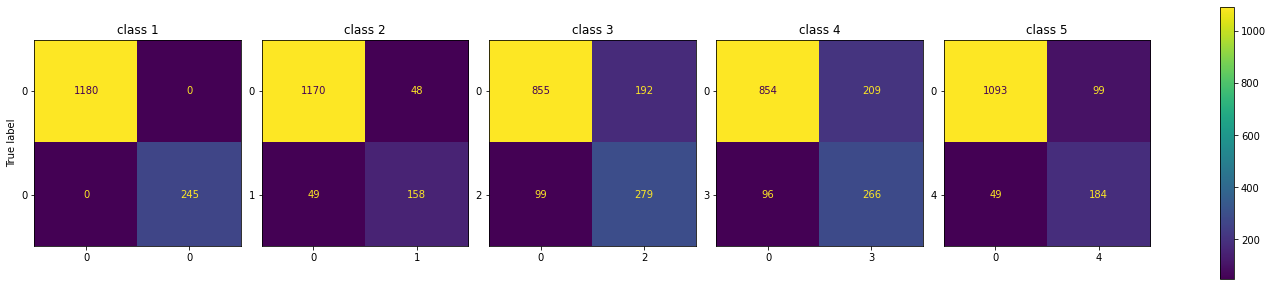

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 5, figsize=(25, 5))
axes = axes.ravel()
for i in range(5):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test_treshhold[:, i],y_pred[:, i]),display_labels=[0, i])
    
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(f'class {i+1}')
    if i<5:
        disp.ax_.set_xlabel('')
    if i%5!=0:
        disp.ax_.set_ylabel('')
    disp.im_.colorbar.remove()
    
    
np.set_printoptions(precision=2)


from sklearn.metrics import precision_recall_fscore_support
# print (classification_report(y_test_treshhold, y_pred))
print("precision" , precision_recall_fscore_support(y_test_treshhold, y_pred, average='macro')[0])
print("recall" , precision_recall_fscore_support(y_test_treshhold, y_pred, average='macro')[1])
print("fscore" , precision_recall_fscore_support(y_test_treshhold, y_pred, average='macro')[2])
print("accuracy" , np.average(accuracy_per_class)*100)


plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()

## Multi Class

In [52]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       245
           2       0.90      0.68      0.77       207
           3       0.66      0.74      0.70       378
           4       0.60      0.69      0.65       362
           5       0.82      0.64      0.72       233

    accuracy                           0.75      1425
   macro avg       0.80      0.75      0.77      1425
weighted avg       0.76      0.75      0.75      1425

precision 0.7967080635039406
recall 0.7508432465872782
fscore 0.7672792276021796
Kappa Score 67


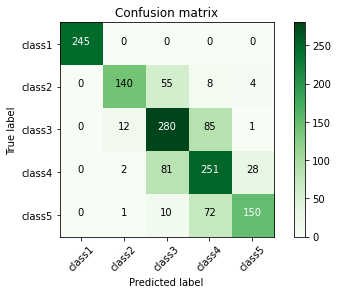

In [53]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2,3,4,5])
np.set_printoptions(precision=2)

from sklearn.metrics import precision_recall_fscore_support
prf = []
for i in range(len(precision_recall_fscore_support(y_test, yhat, average=None))):
    prf.append(precision_recall_fscore_support(y_test, yhat, average=None)[i])
    
kappa_score = cohen_kappa_score(y_test, yhat)
kappa_score = (kappa_score*100).astype(int)

print (classification_report(y_test, yhat))
print("precision" , np.average(prf[0]))
print("recall" , np.average(prf[1]))
print("fscore" , np.average(prf[2]))
print("Kappa Score" , kappa_score)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class1','class2','class3','class4','class5'],normalize= False,  title='Confusion matrix')

# Improve The Model

In [54]:
# RandomForest
# yhat1=clf1.predict(x_test)

# svm rbf
# yhat2=clf2.predict(x_test)

# svm linear
# yhat3=clf3.predict(x_test)

# KNeighbors
# yhat4=clf4.predict(x_test)

# DecisionTree
# yhat5=clf5.predict(x_test)

# GaussianNB
# yhat6=clf6.predict(x_test)

x_train , x_test , y_train , y_test, yhat # Multi Class x,y traint test
x_train_new , x_test_new , y_train_new , y_test_new # Multi label x,y traint test
y_probs #Probibility of Blong to Class
y_test_treshhold # Binarizer Array of Y_test such as [0,0,1,0]
y_pred # Multi label Predict --> y_probs that are upper than best tresh hold->it May have some 1 in array such as [0,1,0,1]

accuracy_score(y_test, yhat)

0.7480701754385964

### Cross Validation

In [55]:
X=x

In [56]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=5)

In [57]:
X_train.shape
y_train.shape
clf.score(x_test, y_test)

0.7480701754385964

In [58]:
from sklearn.model_selection import KFold, cross_val_score

clf_val = RandomForestClassifier()
k_folds = KFold(n_splits = 10)
scores = cross_val_score(clf_val, X, y, cv = k_folds)

# loo = LeaveOneOut()
# loo.get_n_splits(X)
# scores = cross_val_score(clf_val, X, y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.56 0.48 0.54 0.68 0.73 0.73 0.53 0.98 0.82 0.6 ]
Average CV Score:  0.6651427936930936
Number of CV Scores used in Average:  10


In [59]:
# print(y_test.shape)
# print(X.shape)
# print(y_pred.shape)
# y_pred

### Gradient boosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf_gradient.score(X_test, y_test)

0.7480701754385964

### Cost-Sensitive Learning

In [61]:
y_train

array([5, 3, 5, ..., 2, 1, 4])

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Define your custom class weights for neighboring classes
class_weights = {
    (1, 2): 2,  # Misclassifying 1 as 2 is more costly
    (2, 3): 3,   # Misclassifying 2 as 3 is somewhat costly
    (3, 4): 10,   # Misclassifying 3 as 4 is less costly
    (4, 5): 7    # Misclassifying 4 as 5 is even less costly
}

# Replace X_train and y_train with your training data
# X_train should contain your feature vectors, and y_train should contain the corresponding labels.

# Create a function to assign class weights based on the classes
def get_class_weight(label):
    for key in class_weights:
#         print(key)
#         print("------------------")
        if label in key:
#             print(label ,"==>" ,key,"===>", class_weights[key])
#             print("------------------")
            return class_weights[key]
    return 1  # Default weight for classes not specified

# Apply the class weights to your training data labels
sample_weights = [get_class_weight(label) for label in y_train]

# Create the Random Forest classifier with sample weights
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier using the sample weights
rf_classifier.fit(x_train, y_train, sample_weight=sample_weights)

# Now, you can use this trained classifier for prediction and evaluation.

yhat_weight = rf_classifier.predict(x_test)
accuracy_score(y_test, yhat_weight)

0.7192982456140351

## Rate The New Restaurant

In [63]:
def predict_new_resturant(f1,f2,f3,f4,f5,f6,f7,f8):
    output=[]
    
    new_input1 = np.array([f1,f2,f3,f4])
    score1 = computeDeliveryTree(new_input1)
    
    new_input2 = np.array([f5,f6,f7,f8])
    df_input2 = pd.DataFrame(data=new_input2.reshape(1, -1) , columns=["cuisines","average_cost_for_two","price_range","votes"])
    df_input2 = df_input2.values
    df_input2=scaler.transform(df_input2)
    new_input2 = df_input2[0]
    new_input2[3] = f8
    temp_dist = 0
    score2 = 0
    for i in range(5):
        dist = np.linalg.norm(df_input2 - k_means2.cluster_centers_[i])
        if(temp_dist > dist or i==0):
            temp_dist = dist
            score2 = i
    for i in range(len(highCoef2)):
        if(highCoef2[i] == score2):
            score2 = i+1
    new_x = np.array([f1,f5,f7,f8,score1,score2]).reshape(1, -1)
    new_yhat=clf.predict(new_x)
    
     
    output.append(score1)
    output.append(score2)
    output.append(new_yhat[0])
 
    return output

In [64]:
f1=0                #has_online_delivery
f2=1                #has_table_booking
f3=0                #is_delivering_now
f4=0                #switch_to_order_menu
f5=1                #cuisines
f6=1200             #average_cost_for_two
f7=3                #price_range
f8=data["votes"].mean()

output = predict_new_resturant(f1,f2,f3,f4,f5,f6,f7,f8)
cluster_input1= output[0]
cluster_input2= output[1]
new_yhat= output[2]

if(cluster_input1>=3 and cluster_input2>=8):
    print("This resturant have: 'Good Delivery & High Classy ambiance' And user rate predict %d out of 5" % (new_yhat))
elif(cluster_input1>=3 and cluster_input2<8):
    print("This resturant have: 'Good Delivery' And user rate predict %d out of 5" % (new_yhat))
elif(cluster_input1<3 and cluster_input2>=8):
    print("This resturant have: 'High Classy ambiance' And user rate predict %d out of 5" % (new_yhat))
elif(cluster_input1<3 and cluster_input2<8):
    print("This resturant have: 'No Delivery No classy ambiance' And user rate predict %d out of 5" % (new_yhat))

ValueError: X has 4 features, but MinMaxScaler is expecting 2 features as input.